## Plotting fluxes and rates, January 2017 (Sikuliaq)

### Also plotting (for context) McLane pump 15N and 13C data from the ENTP in 2012 

###  - Station P1 onshore (Station 15)
###  - Station P2 offshore (Station 16)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [18]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes.xlsx", index_col = 'sample id')

etnp_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N vs Air N2 (permil),d13C vs VPDB (permil),Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,
1-1_60m_+p,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.2,NaN
2-2_50m_+p,P1,2017,50,50,cone,190.876791,NaN,NaN,NaN,329.466919,329.466919,13.75,2.122054,7.25,NaN,NaN,NaN,NaN
2-2_50m_top,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_+p,P1,2017,150,150,net,159.375771,6.801011,53.605571,NaN,1380.747967,1380.747967,NaN,NaN,NaN,NaN,NaN,NaN,0.147037
3-3_150m_top,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157966


In [19]:
# read the 2012 McLane pump data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

pump_2012 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2012-pumps.xlsx", index_col = 'sample id')

pump_2012.head()

,Station,Year,Depth (m),Pressure [dbar],d13C,C Amount (ug),C (mg),C (umol),d13C Comment,d15N,N Amount (ug),N (umol),d15N Comment,C:N,Tray Name,Amount (mg),Amount Particles (assume 20% sample mass is part),%C
sample id,,,,,,,,,,,,,,,,,,
041312 0550 P-B 55m,PB,2012,55,55,-22.22,221.07,0.22,18.41,NaN,8.55,35.59,2.54,NaN,7.246601,ETNP ETSP ect,36.16,7.232,3.056850
041512 0550 P1 150m,P1,2012,150,150,-25.03,425.41,0.43,35.42,NaN,9.20,63.79,4.55,NaN,7.779494,ETNP ETSP ect,38.23,7.646,5.563861
041312 0550 P1 100m,P1,2012,100,100,-23.95,294.27,0.29,24.50,NaN,8.16,53.66,3.83,NaN,6.397735,ETNP ETSP ect,36.58,7.316,4.022298
041512 0550 P-B 80m,PB,2012,80,80,-26.13,348.64,0.35,29.03,NaN,8.64,64.69,4.62,NaN,6.287227,ETNP ETSP ect,36.50,7.300,4.775880
041512 0550 P2 560m,P2,2012,560,560,-22.85,159.43,0.16,13.28,NaN,9.79,24.14,1.72,NaN,7.703422,ETNP ETSP ect,37.64,7.528,2.117871


In [20]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P2')]
P1_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P1')]

P2_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N vs Air N2 (permil),d13C vs VPDB (permil),Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,
1-12_73m_+p,P2,2017,73,73,cone,81.787511,NaN,103.064253,97.773979,NaN,NaN,NaN,NaN,NaN,NaN,-22.9725,NaN,NaN
1-12_148m_+p,P2,2017,148,148,cone,90.820391,NaN,66.997775,62.585555,NaN,NaN,NaN,NaN,NaN,NaN,-25.9195,NaN,NaN
2-14_100m_+p,P2,2017,100,100,cone,138.442644,10.613096,NaN,NaN,314.713044,314.713044,17.0,7.922464,2.0,NaN,NaN,9.4,0.094223
2-14_100m_top,P2,2017,100,100,cone,NaN,10.613096,37.576112,34.990792,NaN,NaN,NaN,NaN,NaN,NaN,-26.0099,NaN,0.094223
2-14_150m_+p,P2,2017,150,150,net,70.654491,NaN,NaN,NaN,1920.245297,1920.245297,32.0,2.014861,3.5,NaN,NaN,21.1,NaN


In [21]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2012 = pump_2012.loc[(pump_2012['Station'] == 'P2')]
P1_2012 = pump_2012.loc[(pump_2012['Station'] == 'P1')]

P1_2012.head()

,Station,Year,Depth (m),Pressure [dbar],d13C,C Amount (ug),C (mg),C (umol),d13C Comment,d15N,N Amount (ug),N (umol),d15N Comment,C:N,Tray Name,Amount (mg),Amount Particles (assume 20% sample mass is part),%C
sample id,,,,,,,,,,,,,,,,,,
041512 0550 P1 150m,P1,2012,150,150,-25.03,425.41,0.43,35.42,NaN,9.20,63.79,4.55,NaN,7.779494,ETNP ETSP ect,38.23,7.646,5.563861
041312 0550 P1 100m,P1,2012,100,100,-23.95,294.27,0.29,24.50,NaN,8.16,53.66,3.83,NaN,6.397735,ETNP ETSP ect,36.58,7.316,4.022298
040112 0500 P1 45m,P1,2012,45,45,-23.94,453.47,0.45,37.76,NaN,9.43,74.00,5.28,NaN,7.148786,ETNP ETSP ect,34.40,6.880,6.591191
041012 0500 P1 155m,P1,2012,155,155,-25.08,305.52,0.31,25.44,NaN,9.66,43.59,3.11,NaN,8.175434,ETNP ETSP ect,35.33,7.066,4.323864
040212 0500P-1 1000m,P1,2012,1000,1000,-22.86,132.54,0.13,11.04,NaN,11.11,17.74,1.27,Precision decreases for samples containing les...,8.717488,ETNP ETSP ect,34.21,6.842,1.937141


In [22]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [23]:
import ctd


castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-043avg.cnv")
downP2, upP2 = castP2.split()

# rename the 'depSMignore' column 'Depth'
# delete the scan, nbin, and flag columns

del downP2['scan']
del downP2['nbin']
del downP2['flag']


downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/skq201617s-P2-043avg.csv")

downP2.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
Pressure [dbar],,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12


In [24]:
# Merge station flux and station cast dataframes on their indices

P2_join = P2_2017.merge(downP2,on='Pressure [dbar]')

# Save to csv and fill empty cells

P2_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/SKQ_2017_P2_cast_trap_join.csv", na_rep='NULL')

P2_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),...,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
0,P2,2017,73,73,cone,81.787511,NaN,103.064253,97.773979,NaN,...,34.6423,34.6487,1025.2820,24.9614,0.38130,8.217,233.87545,0.1490,96.3430,1.000000e-12
1,P2,2017,148,148,cone,90.820391,NaN,66.997775,62.585555,NaN,...,34.8053,34.8129,1026.9442,26.2828,0.10563,0.405,259.33631,0.1404,96.5510,1.000000e-12
2,P2,2017,100,100,cone,138.442644,10.613096,NaN,NaN,314.713044,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
3,P2,2017,100,100,cone,NaN,10.613096,37.576112,34.990792,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
4,P2,2017,100,100,cone,111.165761,7.592958,NaN,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12


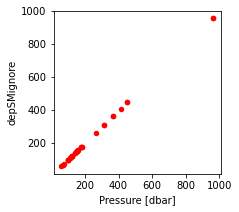

In [25]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P2_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [26]:
import ctd


castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
downP1, upP1 = castP1.split()

del downP1['scan']
del downP1['nbin']
del downP1['flag']

# write to csv for use in making flux-density plots

downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/skq201617s-P1-030avg.csv")

downP1.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,0.22573,198.250,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,0.22553,198.699,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,0.21799,198.879,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,0.23032,198.809,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,0.23932,199.086,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12


In [27]:
# Merge station flux and station cast dataframes on their indices

P1_join = P1_2017.merge(downP1,on='Pressure [dbar]')

# Save to csv and fill empty cells

P1_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/SKQ_2017_P1_cast_trap_join.csv", na_rep='NULL')

P1_join.head(20)

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),...,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
0,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,...,25.2467,0.405400,28.237,240.40529,0.1338,96.7096,3.0942,1.6025,-2.332,1.000000e-12
1,P1,2017,50,50,cone,190.876791,NaN,NaN,NaN,329.466919,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
2,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
3,P1,2017,150,150,net,159.375771,6.801011,53.605571,NaN,1380.747967,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
4,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
5,P1,2017,150,150,cone,132.055748,NaN,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
6,P1,2017,150,150,cone,NaN,NaN,82.129263,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
7,P1,2017,100,100,cone,127.943386,NaN,NaN,NaN,240.000000,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
8,P1,2017,100,100,cone,NaN,NaN,45.629060,NaN,952.869565,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
9,P1,2017,90,90,cone,103.732832,NaN,NaN,NaN,NaN,...,25.9231,0.550040,0.838,250.83089,0.1490,96.3430,3.6862,1.4313,-2.404,1.000000e-12


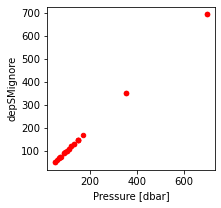

In [28]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P1_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [29]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# P2

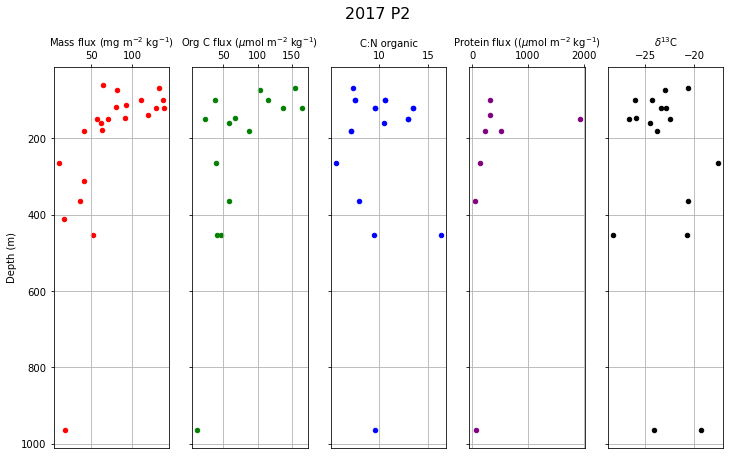

In [44]:
# Five-panel plot with delN15

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(12, 7))

fig2.suptitle('2017 P2', fontsize=16, y = 1.0)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)
#wrap_labels(ax2, 10)

# Organic carbon flux

P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)
#wrap_labels(ax3, 10)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# d15N of sinking non incubated sinking particles

P2_2017.plot(ax = ax6, kind='scatter', x='d13C vs VPDB (permil)', y='Pressure [dbar]', c='Black')
#ax4.plot(fluo,depth,'o-g')
ax6.set_xlabel('$\delta$$^{13}$C')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.yaxis.set_visible(False) # This erases the y ticks
ax6.grid(True)

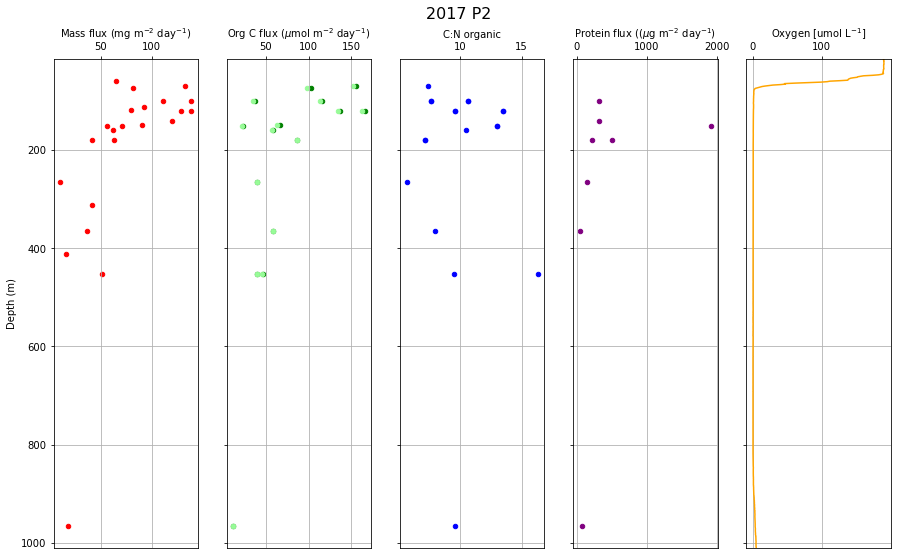

In [46]:
# Five-panel plot

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P2', fontsize=16, y = 0.96)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux
# uncorrected
P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ day$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# suspended POC corrected
P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux sus POC correction (umol C/m2/day)', y='Pressure [dbar]', c='palegreen')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ day$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$g m$^{-2}$ day$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP2.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

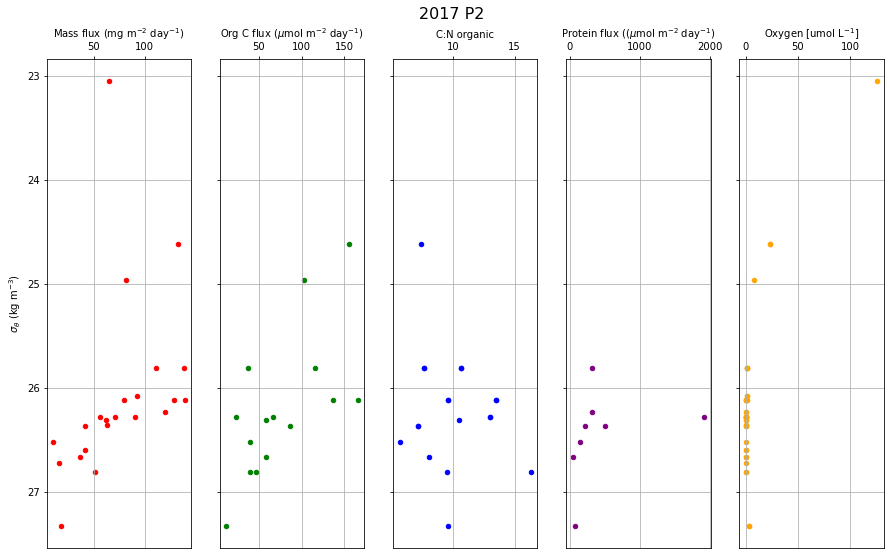

In [32]:
# plot flux with density using the merged cast and trap file

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P2', fontsize=16, y = 0.96)

# Mass flux

P2_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-t00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ day$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-t00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ day$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-t00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-t00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ day$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P2_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-t00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);

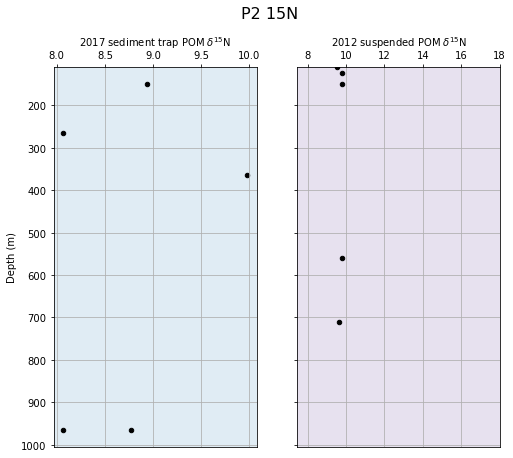

In [17]:
# plot trap (2017) vs pump (2012) 15N and 13C

# 2 panel plot with P2 2017 15N and 2012 15N in depth space

fig2, (ax2, ax3) = plt.subplots(1,2,sharey=True, figsize=(8,7))

fig2.suptitle('P2 15N', fontsize=16, y = 1.0)

# 2017 P2 traps

P2_2017.plot(ax = ax2, kind='scatter', x='d15N vs Air N2 (permil)', y='Pressure [dbar]', c='Black')
ax2.set_facecolor('#e0ecf4')
ax2.set_ylabel('Depth (m)')
#ax2.set_xlim([0, 150])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 sediment trap POM $\delta$$^{15}$N')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# 2012 P2 pumps

P2_2012.plot(ax = ax3, kind='scatter', x='d15N', y='Pressure [dbar]', c='Black')
ax3.set_facecolor('#e7e1ef')
#ax3.set_xlim([0, 150])
ax3.set_xlabel('2012 suspended POM $\delta$$^{15}$N')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True);



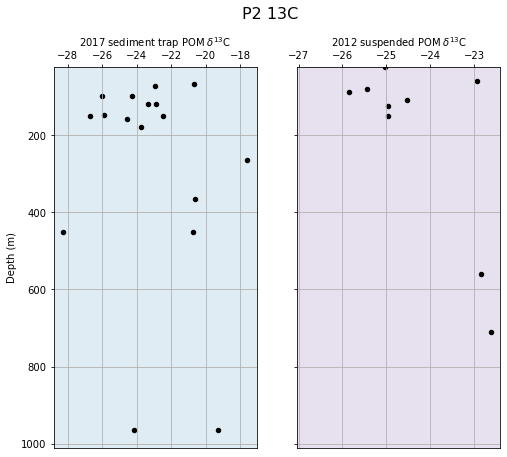

In [18]:
# plot trap (2017) vs pump (2012) 15N and 13C

# 2 panel plot with P2 2017 13C and 2012 13C in depth space

fig2, (ax2, ax3) = plt.subplots(1,2,sharey=True, figsize=(8,7))

fig2.suptitle('P2 13C', fontsize=16, y = 1.0)

# 2017 P2 traps

P2_2017.plot(ax = ax2, kind='scatter', x='d13C vs VPDB (permil)', y='Pressure [dbar]', c='Black')
ax2.set_facecolor('#e0ecf4')
ax2.set_ylabel('Depth (m)')
#ax2.set_xlim([0, 150])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('2017 sediment trap POM $\delta$$^{13}$C')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# 2012 P2 pumps

P2_2012.plot(ax = ax3, kind='scatter', x='d13C', y='Pressure [dbar]', c='Black')
ax3.set_facecolor('#e7e1ef')
#ax3.set_xlim([0, 150])
ax3.set_xlabel('2012 suspended POM $\delta$$^{13}$C')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True);



# P1

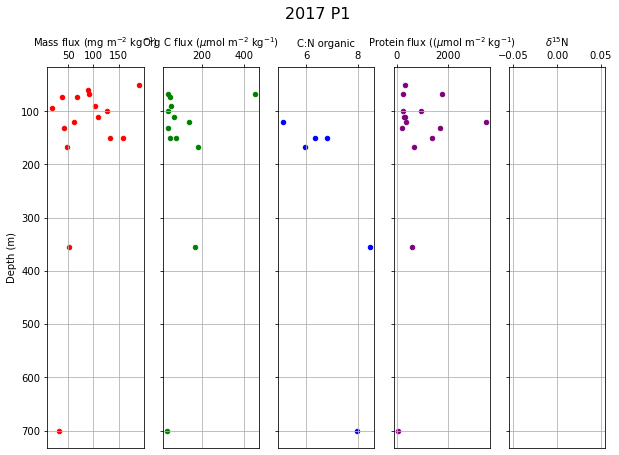

In [19]:
# Five-panel plot with delN15

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(10, 7))

fig2.suptitle('2017 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# d15N of sinking non incubated sinking particles

P1_2017.plot(ax = ax6, kind='scatter', x='d15N vs Air N2 (permil)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax6.set_xlabel('$\delta$$^{15}$N')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.yaxis.set_visible(False) # This erases the y ticks
ax6.grid(True)

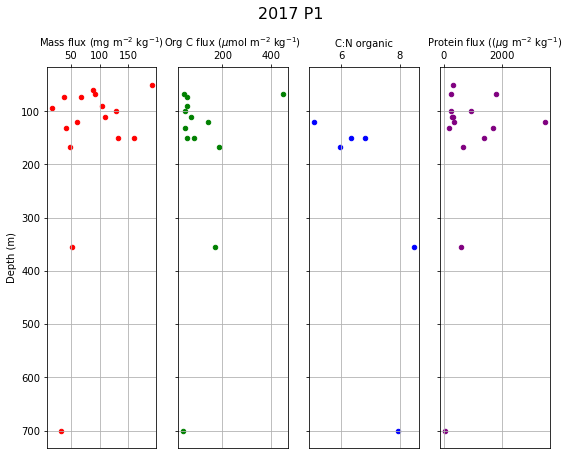

In [20]:
# Four-panel plot

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2017 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$g m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

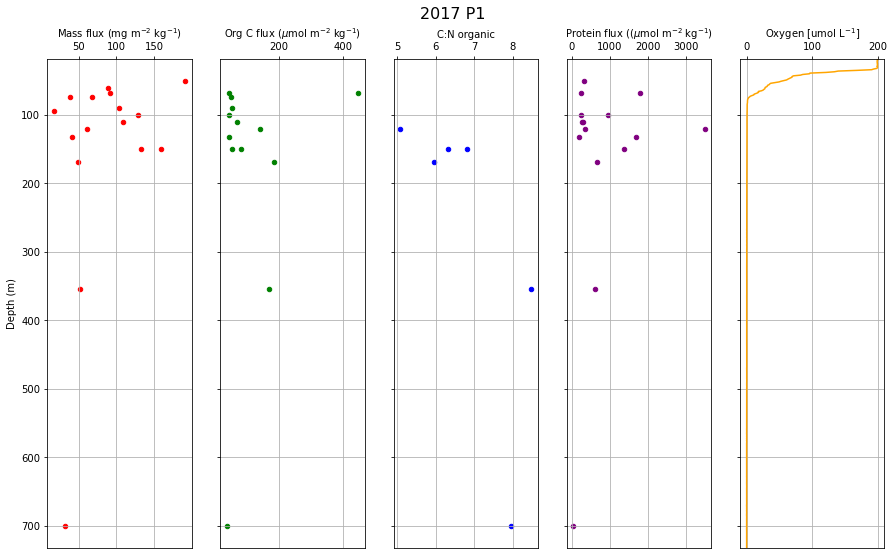

In [21]:
# Five-panel plot

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P1', fontsize=16, y = 0.96)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP1.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

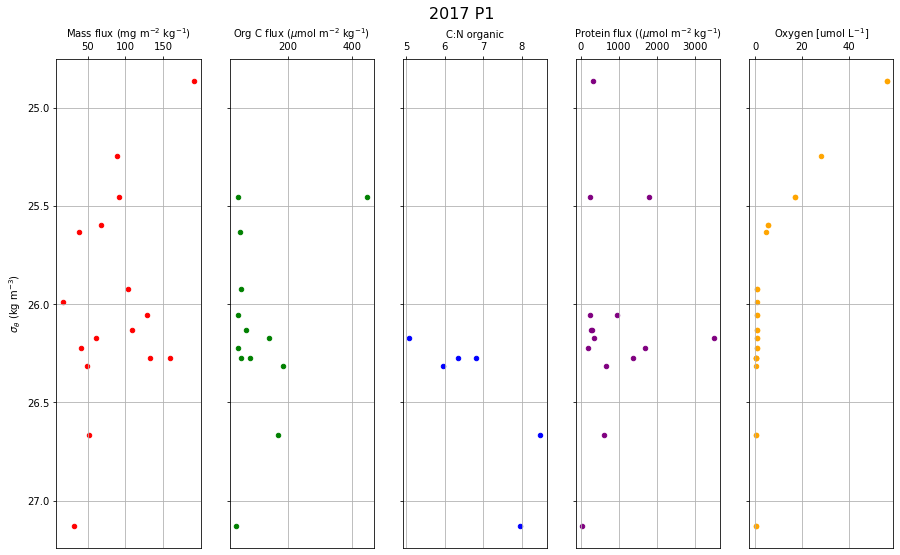

In [22]:
# plot flux with density using the merged cast and trap file

#from matplotlib import style
#style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P1', fontsize=16, y = 0.96)

# Mass flux

P1_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-t00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-t00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-t00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-t00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P1_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-t00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);

## P1 and P2 together for sinking particle stoichiometry figure

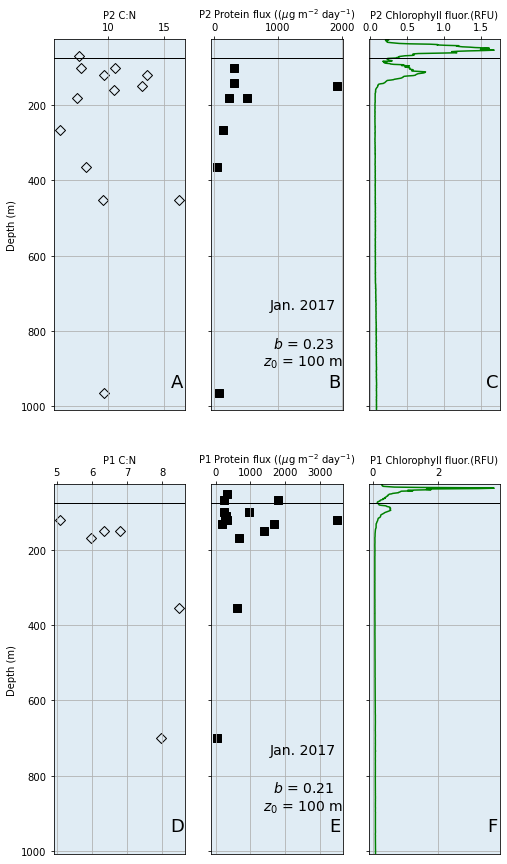

In [31]:
# 4 panel plot


fig, ax = plt.subplots(2, 3, sharey=True, figsize=(8,15))

#fig2.suptitle('Stoichiometry', fontsize=16, y = 0.96)

# C/N of sinking particles P2 2017

P2_2017.plot(ax = ax[0,0], kind='scatter', x='C:N organic', \
             y='Pressure [dbar]', s = 50, marker = 'D', color = '#e0ecf4', edgecolor = 'black')
ax[0,0].set_facecolor('#e0ecf4')
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax[0,0].set_xlabel('P2 C:N')
ax[0,0].xaxis.set_label_position('top') # this moves the label to the top
ax[0,0].xaxis.set_ticks_position('top') # this moves the ticks to the top

ax[0,0].grid(True)
ax[0,0].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.

ax[0,0].annotate('A', xy=(8, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            )

# Protein flux at P2 2017

P2_2017.plot(ax = ax[0,1], kind='scatter', x='Protein flux (ug/m2/day)', \
             y='Pressure [dbar]', s = 50, marker = 's', color = 'black', edgecolor = 'black')
ax[0,1].set_facecolor('#e0ecf4')
ax[0,1].set_xlabel('P2 Protein flux (($\mu$g m$^{-2}$ day$^{-1}$)')
ax[0,1].xaxis.set_label_position('top') # this moves the label to the top
ax[0,1].xaxis.set_ticks_position('top') # this moves the ticks to the top

ax[0,1].grid(True)
ax[0,1].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.


ax[0,1].annotate('B', xy=(30, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            )

ax[0,1].annotate('Jan. 2017', xy=(150, 100), 
            xytext=(0.7, 0.3), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax[0,1].annotate('$\it{b}$ = 0.23', xy=(150, 100), 
            xytext=(0.7, 0.2), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax[0,1].annotate('$\it{z}_0$ = 100 m', xy=(150, 100), 
            xytext=(0.7, 0.15), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# Chlorophyll at P2 2017

downP2.plot(ax = ax[0,2], kind='line', x='flSP', y='depSMignore', c='Green') 
ax[0,2].set_facecolor('#e0ecf4')
ax[0,2].set_xlabel('P2 Chlorophyll fluor.(RFU)')
ax[0,2].xaxis.set_label_position('top') # this moves the label to the top
ax[0,2].xaxis.set_ticks_position('top') # this moves the ticks to the top
ax[0,2].get_legend().remove()

ax[0,2].grid(True)
ax[0,2].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.

ax[0,2].annotate('C', xy=(1, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            )

# C/N of sinking particles at P1 2017

P1_2017.plot(ax = ax[1,0], kind='scatter', x='C:N organic', \
             y='Pressure [dbar]', s = 50, marker = 'D', color = '#e0ecf4', edgecolor = 'black')
ax[1,0].set_facecolor('#e0ecf4')
ax[1,0].set_ylabel('Depth (m)')
ax[1,0].set_xlabel('P1 C:N')
ax[1,0].xaxis.set_label_position('top') # this moves the label to the top
ax[1,0].xaxis.set_ticks_position('top') # this moves the ticks to the top

ax[1,0].grid(True)
ax[1,0].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.

ax[1,0].annotate('D', xy=(8, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            )

# Protein flux at P1 2017

P1_2017.plot(ax = ax[1,1], kind='scatter', x='Protein flux (ug/m2/day)', \
             y='Pressure [dbar]', s = 50, marker = 's', color = 'black', edgecolor = 'black')
ax[1,1].set_facecolor('#e0ecf4')
ax[1,1].set_xlabel('P1 Protein flux (($\mu$g m$^{-2}$ day$^{-1}$)')
ax[1,1].xaxis.set_label_position('top') # this moves the label to the top
ax[1,1].xaxis.set_ticks_position('top') # this moves the ticks to the top

ax[1,1].grid(True)
ax[1,1].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.

ax[1,1].annotate('E', xy=(30, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            )

ax[1,1].annotate('Jan. 2017', xy=(150, 100), 
            xytext=(0.7, 0.3), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax[1,1].annotate('$\it{b}$ = 0.21', xy=(150, 100), 
            xytext=(0.7, 0.2), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax[1,1].annotate('$\it{z}_0$ = 100 m', xy=(150, 100), 
            xytext=(0.7, 0.15), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# Chlorophyll at P1 2017

downP1.plot(ax = ax[1,2], kind='line', x='flSP', y='depSMignore', c='Green') 
ax[1,2].set_facecolor('#e0ecf4')
ax[1,2].set_xlabel('P1 Chlorophyll fluor.(RFU)')
ax[1,2].xaxis.set_label_position('top') # this moves the label to the top
ax[1,2].xaxis.set_ticks_position('top') # this moves the ticks to the top
ax[1,2].get_legend().remove()

ax[1,2].grid(True)
ax[1,2].axhline(y=75, color = 'black', linewidth=1) # horizonal line that denotes the onset of anoxia.


ax[1,2].annotate('F', xy=(1, 100), 
            xytext=(0.94, 0.1), textcoords='axes fraction',
            color='black', fontsize=18,
            horizontalalignment='center', verticalalignment='top'
            );